### Customizing Scanpy plots

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Inital setting for plot size
from matplotlib import rcParams

FIGSIZE = (3, 3)
rcParams['figure.figsize'] = FIGSIZE


In [5]:
adata = sc.datasets.pbmc68k_reduced()

### matplotlib 개체 다루기
**Scanpy** 플롯은 **Matplotlib** 개체를 기반으로 하며, **Scanpy** 함수에서 이 개체를 얻어 추가적으로 사용자 정의할 수 있다.

**Matplotlib** 플롯은 **Figure** 개체에 그려지며, 이 **Figure**는 하나 또는 여러 개의 **Axes** 개체를 포함한다.

일부 **Scanpy** 함수는 아래와 같이 이미 정의된 **Axes**를 입력으로 받을 수도 있다.

**Scanpy**의 일부 플롯팅 함수는 플롯을 생성하는 방식이 다르기 때문에, 사용자 정의 방법도 조금씩 달라진다.

어떤 함수는 개별 **Axes** 개체에 플롯을 그린느 반면, 다른 함수들은 전체 **Figure**를 사용하여 **Axes** 를 조합해 하나의 플롯을 표시한다.

또한, 연속적인 **Colorbar** 나 불연속적인 **Legend**와 같은 다양한 종류의 범례를 사용하는 등 다른 차이점도 있다.



### Figure와 Axes 개체

**Scanpy** 플롯팅 함수는 return_fig=True로 설정하여 Figure 또는 플롯 개체를 반환하거나, show=False로 설정하여 Axes 개체를 반환할 수 있다.

show 매개변수는 플롯이 렌더링(화면에 그려지는)되는 시점도 조절한다.

**Scanpy** 플롯팅 함수를 호출한 후 Axes를 사용자 정의하려면, 모든 조정이 완료된 후에만 플롯이 렌더링되도록 show=False로 설정해야 한다.

예를 들어, UMAP과 같은 임베딩(embedding) 플롯에서는 show=False를 설정하여 Axes를 얻거나, return_fig=True를 설정하여 figure.axes에 Axes를 저장하는 전체 Figure를 얻을 수 있다.

플롯팅된 범주가 하나인 경우에는 하나의 Axes 개체가 생성되고, 연속적인 범주인 경우에는 UMAP 플롯과 측면의 컬러바를 위한 두 개의 Axes 개체가 생생된다.

하지만 컬러바의 Axes 개체를 얻으려면 show=False 대신 return_fig=True를 사용해야 한다.

Figure에서 Axes에 접근할 때 반환되는 객체는 리스트 형태이므로, 수정하려는 특정 Axes를 선택해야 한다. 

show=False를 통해 Axes를 직접 반환받을 때는, 해당 Figure에 Axes 개체가 하나뿐이면 단일 Axes 개체를 얻고, 여러 개가 생성된 경우에는 Axes 리스트를 얻게 된다.

In [6]:
# Examples of returned objects from the UMAP function

print("Categorical plots:")
axes = sc.pl.umap(adata, color=["bulk_labels"], show=False)
print("Axis from a single category plot:", axes)
plt.close()
axes = sc.pl.umap(adata, color=["bulk_labels", "S_score"], show=False)
print("Axes list from two categorical plots:", axes)
plt.close()
fig = sc.pl.umap(adata, color=["bulk_labels"], return_fig=True)
print("Axes list from a figure with one categorical plot:", fig.axes)
plt.close()

print("\nContinous plots:")
axes = sc.pl.umap(adata, color=["IGJ"], show=False)
print("Axes from one continuous plot:", axes)
plt.close()
fig = sc.pl.umap(adata, color=["IGJ"], return_fig=True)
print("Axes list from a figure of one continous plot:", fig.axes)
plt.close()

Categorical plots:
Axis from a single category plot: Axes(0.125,0.11;0.775x0.77)
Axes list from two categorical plots: [<Axes: title={'center': 'bulk_labels'}, xlabel='UMAP1', ylabel='UMAP2'>, <Axes: title={'center': 'S_score'}, xlabel='UMAP1', ylabel='UMAP2'>]
Axes list from a figure with one categorical plot: [<Axes: title={'center': 'bulk_labels'}, xlabel='UMAP1', ylabel='UMAP2'>]

Continous plots:
Axes from one continuous plot: Axes(0.125,0.11;0.70525x0.77)
Axes list from a figure of one continous plot: [<Axes: title={'center': 'IGJ'}, xlabel='UMAP1', ylabel='UMAP2'>, <Axes: label='<colorbar>'>]


특정 플롯에서 사용되는, (ex: dotplot)은 더 복잡ㅂ한 구조를 가지고 있다.

이들은 여러 Axes를 포함하는 특별한 플롯 객체로 이루어져 있으며, 각 Axes는 플롯의 다른 부분들을 그리는 데 사용된다.

In [7]:
axes = sc.pl.dotplot(adata, ["CD79A","MS4A1"],"bulk_labels", show=False)
print("Axes returened from a dotplot object:", axes)
dp = sc.pl.dotplot(adata, ["CD79A","MS4A1"],"bulk_labels", return_fig=True)
print("Dotplot object:", dp)
plt.close()

Axes returened from a dotplot object: {'mainplot_ax': <Axes: >, 'size_legend_ax': <Axes: title={'center': 'Fraction of cells\nin group (%)'}>, 'color_legend_ax': <Axes: title={'center': 'Mean expression\nin group'}>}
Dotplot object: <scanpy.plotting._dotplot.DotPlot object at 0x176f9cf50>


### Using matplotlib Axes to customize plot alignment

여러 다른 플롯을 결합할 때 미리 정의된 매트플롯립 축을 이부 플롯 함수 (ex: embedding)로 전달할 수 있다.

이 기능은 서브플롯의 배치를 사용자가 직접 지정하거나, 두 가지 다른 종류의 플롯 또는 두 가지 다른 데이터 부분 집합을 나란히 보여주고 싶을 때 유용하다.

**show** 매개변수에 대한 참고 사항

플롯이 화면에 렌더링되려면 이 매개변수가 필요하다.


axes: [<Axes: > <Axes: >]


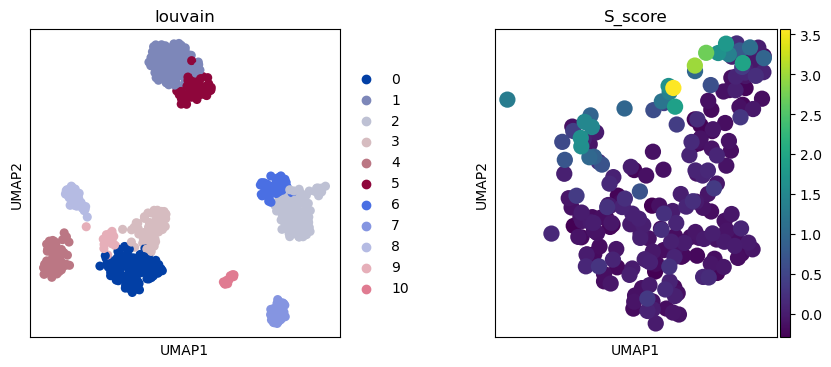

In [8]:
# Define matplotlib Axes
# Number of Axes & plot size
ncols = 2
nrows = 1
figsize = 4
wspace = 0.5
fig, axs = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ncols * figsize + figsize * wspace * (ncols - 1), nrows * figsize),
)
plt.subplots_adjust(wspace=wspace)
# This produces two Axes objects in a single Figure
print("axes:", axs)

# We can use these Axes objects individually to plot on them
# We need to set show=False so that the Figure is not displayed before we
# finished plotting on all Axes and making all plot adjustments
sc.pl.umap(adata, color="louvain", ax=axs[0], show=False)
# Example zoom-in into a subset of louvain clusters
sc.pl.umap(
    adata[adata.obs.louvain.isin(["0", "3", "9"]), :], color="S_score", ax=axs[1]
)

**Axes**는 **Figure**에서 제거할 수도 있다. 예를 들어, 행마다 다른 수의 열을 갖도록 할 수 있다.

**Matplotlib**는 또한 더 고급 Axes 정렬 사용자 정의를 지원하며, **GridSpec**을 사용한 다양한 크기의 **Axes**를 생성하는 기능도 제공한다.

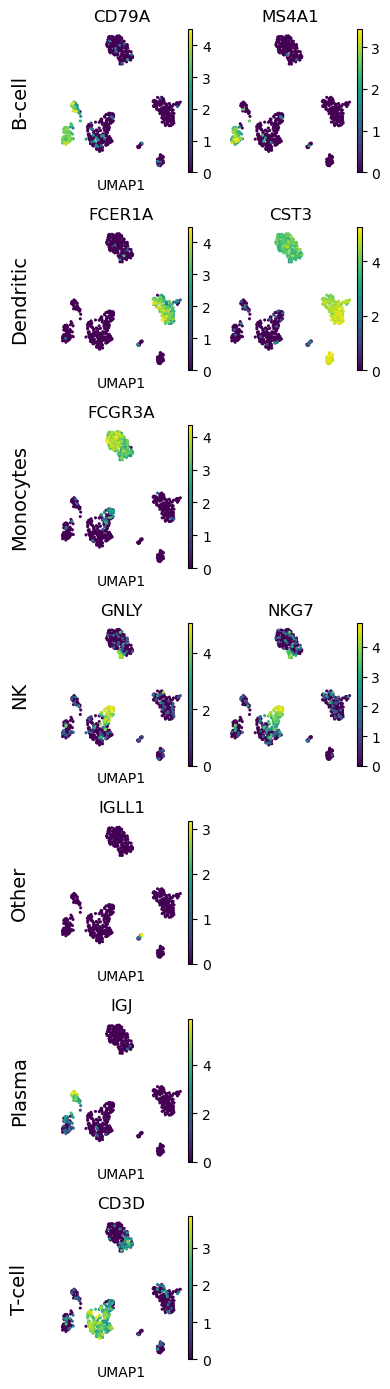

In [9]:
# In this example we want to show UMAPs of different cell type markers,
# with markers of a single cell type in one row
# and with a different number of markers per cell type (row)

# Marker genes
marker_genes = {
    "B-cell": ["CD79A", "MS4A1"],
    "Dendritic": ["FCER1A", "CST3"],
    "Monocytes": ["FCGR3A"],
    "NK": ["GNLY", "NKG7"],
    "Other": ["IGLL1"],
    "Plasma": ["IGJ"],
    "T-cell": ["CD3D"],
}
# Make Axes
# Number of needed rows and columns (based on the row with the most columns)
nrow = len(marker_genes)
ncol = max([len(vs) for vs in marker_genes.values()])
fig, axs = plt.subplots(nrow, ncol, figsize=(2 * ncol, 2 * nrow))
# Plot expression for every marker on the corresponding Axes object
for row_idx, (cell_type, markers) in enumerate(marker_genes.items()):
    col_idx = 0
    for marker in markers:
        ax = axs[row_idx, col_idx]
        sc.pl.umap(adata, color=marker, ax=ax, show=False, frameon=False, s=20)
        # Add cell type as row label - here we simply add it as ylabel of
        # the first Axes object in the row
        if col_idx == 0:
            # We disabled axis drawing in UMAP to have plots without background and border
            # so we need to re-enable axis to plot the ylabel
            ax.axis("on")
            ax.tick_params(
                top="off",
                bottom="off",
                left="off",
                right="off",
                labelleft="on",
                labelbottom="off",
            )
            ax.set_ylabel(cell_type + "\n", rotation=90, fontsize=14)
            ax.set(frame_on=False)
        col_idx += 1
    # Remove unused column Axes in the current row
    while col_idx < ncol:
        axs[row_idx, col_idx].remove()
        col_idx += 1
# Alignment within the Figure
fig.tight_layout()

### Plot size
플롯 크기를 조정할 수 있는 여러 가지 옵션이 있다.

rcParams['figure.figsize']를 설정하여 플롯 크기를 조정할 수 있으며, 이 설정은 이후에 그려지는 모든 플롯에도 적용된다.

Matplotlib의 **rcParams**를 감싸는 Scanpy의 set_figure_params()를 사용하거나, 직접 수정 및 변경할 수 있다.

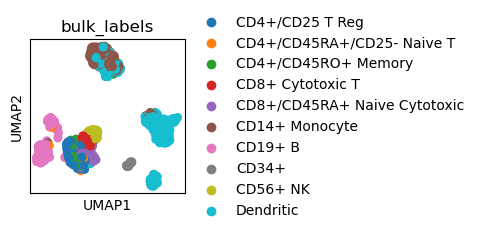

In [10]:
rcParams['figure.figsize'] = (2, 2)
sc.pl.umap(adata, color='bulk_labels')

#set back to value selected above
rcParams['figure.figsize'] = FIGSIZE

context manager를 사용하여 단일 플롯에 대해 rcParams를 설정할 수 있다.

향후 플롯의 설정을 변경하지 않는다.

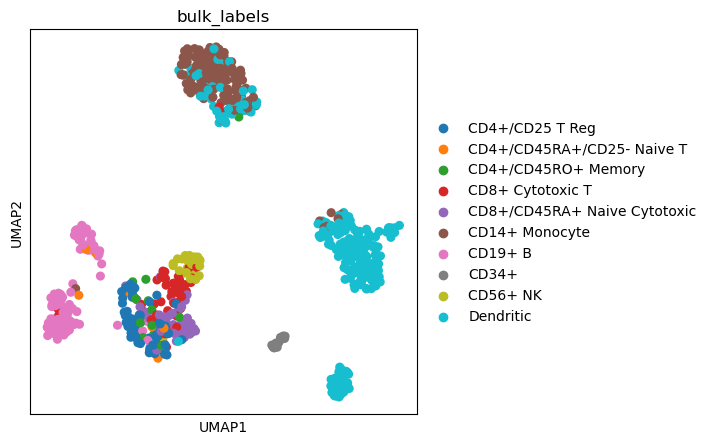

In [11]:
with plt.rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(adata, color="bulk_labels")

미리 정의된 크기의 Axes 객체를 생성하여 Scanpy plotting function로 전달할 수 있다.

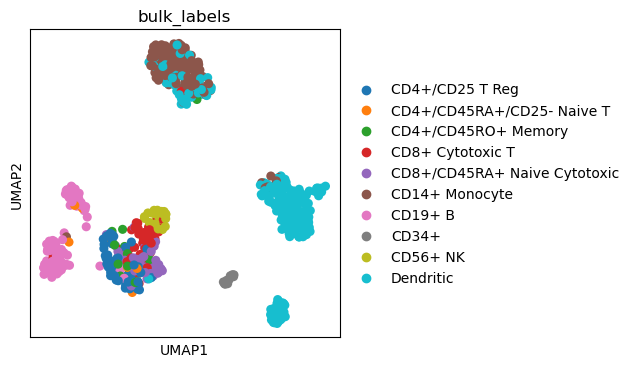

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))
sc.pl.umap(adata, color="bulk_labels", ax=ax)

figsize는 모든 Axes와 그 사이의 공간에 나누어진다.

따라서 여러 개의 Axes(열 또는 행)가 있다면, 그에 맞춰 figsize를 적절히 늘려야 한다.

하지만 scanpy 임베딩 함수에 Axes 객체를 전달하지 않으면, 현재 전역 figsize(예: Matplotlib의 figure.figsize에 의해 지정된 크기)를 사용하여 개별 Axes를 자동으로 생성된다.

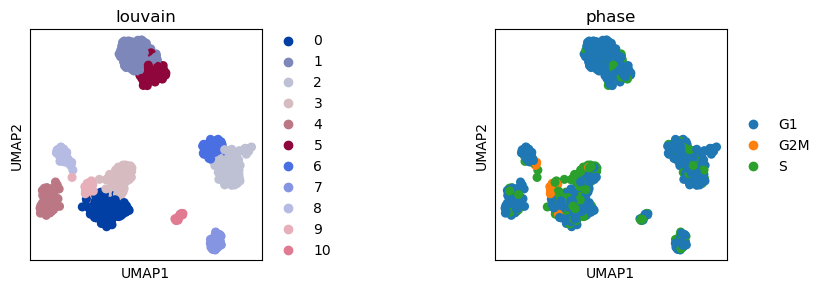

In [13]:
ncol = 2
nrow = 1
figsize = 3
wspace = 1
# Adapt figure size based on number of rows and columns and added space between them
# (e.g. wspace between columns)
fig, axs = plt.subplots(
    nrow, ncol, figsize=(ncol * figsize + (ncol - 1) * wspace * figsize, nrow * figsize)
)
plt.subplots_adjust(wspace=wspace)
sc.pl.umap(adata, color="louvain", ax=axs[0], show=False)
sc.pl.umap(adata, color="phase", ax=axs[1])

### Adjust space between subplots

하나의 행 또는 열에 여러 플롯 (ex: Embedding plots)을 그릴 때, 범례(legend)가 옆에 있는 플롯과 겹치는 경우가 발생 할 수 있다.

**wspace**(너비) 또는 **hspace**(높이) 매개변수를 설정하여 해결할 수 있다.

이 매개변수들은 플롯을 그리기 위해 **Axes**를 생성할 때도 마찬가지로 사용될 수 있다.

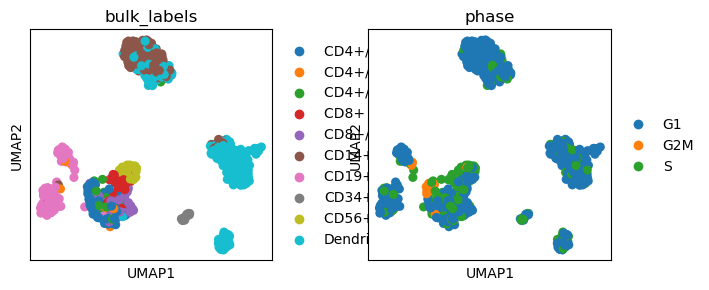

In [14]:
# Default, legend is overlapping
sc.pl.umap(adata, color=["bulk_labels", "phase"])

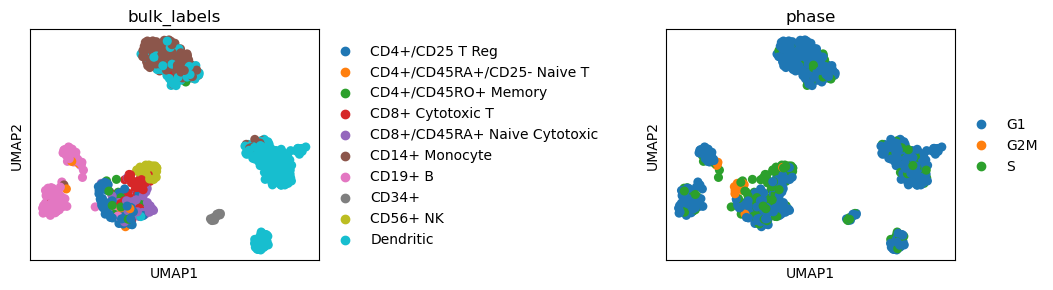

In [15]:
# Increase gap size between plots
sc.pl.umap(adata, color=["bulk_labels", "phase"], wspace=1)

### Adapt axes appearance

플롯 객체를 추가로 수정하여 축 텍스트, 제목 크기, 글꼴 유형, 글꼴 색상 등을 변경할 수 있다.

일부 Scanpy 플롯팅 함순느 플롯의 모양을 조정하기 위한 미리 정의된 매개변수를 이미 가지고 있다.

ex) 임베딩 플롯 함수는 title 매개변수로 제목을 설정, frameon 매개변수로 플롯의 배경을 투명하게 만들 수 있다.

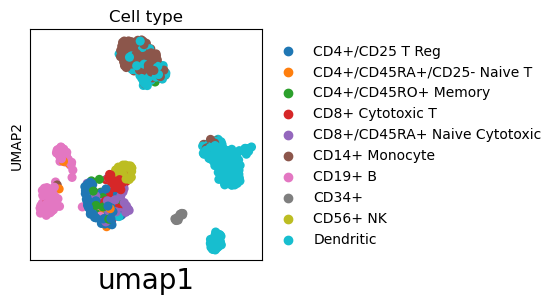

In [16]:
# Set title with the title parameter
# Return Axes to further modify the plot
ax = sc.pl.umap(adata, color="bulk_labels", title="Cell type", show=False)
# Modify xlabel
_ = ax.set_xlabel("umap1", fontsize=20)

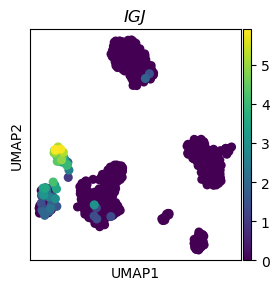

In [17]:
# Make title italic
ax = sc.pl.umap(adata, color="IGJ", show=False)
_ = ax.set_title("IGJ", style="italic")

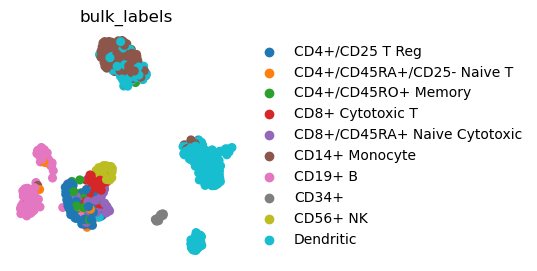

In [18]:
# Transparent background and no borders/axis labels with frameon=False
sc.pl.umap(adata, color="bulk_labels", frameon=False)

개별 축 라벨의 모양을 변경할 수도 있음.

이는 닷플롯처럼 여러 유전자나 세포 그룹을 보여주면서 그중 일부를 강조하고 싶을 때 특히 유용할 수 있다.

Dotplot axes: {'mainplot_ax': <Axes: >, 'size_legend_ax': <Axes: title={'center': 'Fraction of cells\nin group (%)'}>, 'color_legend_ax': <Axes: title={'center': 'Mean expression\nin group'}>}


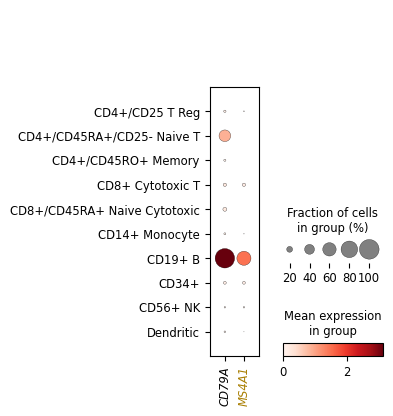

In [19]:
dp = sc.pl.dotplot(adata, ["CD79A", "MS4A1"], "bulk_labels", show=False)
# All Axes used in dotplot
print("Dotplot axes:", dp)
# Select the Axes object that contains the subplot of interest
ax = dp["mainplot_ax"]
# Loop through ticklabels and make them italic
for l in ax.get_xticklabels():
    l.set_style("italic")
    g = l.get_text()
    # Change settings (e.g. color) of certain ticklabels based on their text (here gene name)
    if g == "MS4A1":
        l.set_color("#A97F03")

### Labels and legneds
### Customizing legends

Scanpy 플롯에서 범례에 나타나는 그룹들의 순서를 지정하려면, 해당 그룹(범주)들이 속한 pandas DataFrame의 .obs 열에 순서를 설정하면 된다.

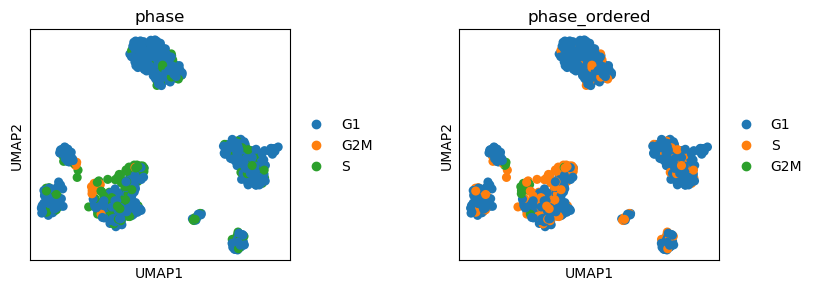

In [20]:
# The default ordering of cell cycle phases is alphabetical
# To ensure that the ordering corresponds to cell cycle define order of categories;
# this should include all categories in the corresponding pandas table column
phases = ["G1", "S", "G2M"]
adata.obs["phase_ordered"] = pd.Categorical(
    values=adata.obs.phase, categories=phases, ordered=True
)
sc.pl.umap(adata, color=["phase", "phase_ordered"], wspace=0.5)
# This just removes the newly added ordered column from adata as we do not need it below
adata.obs.drop("phase_ordered", axis=1, inplace=True)

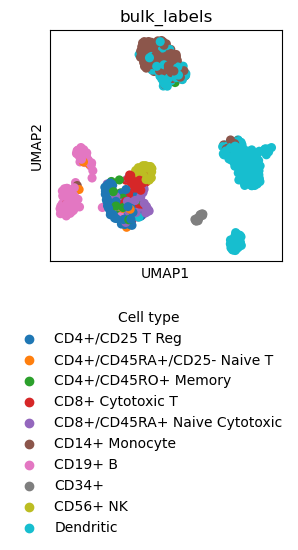

In [21]:
fig = sc.pl.umap(adata, color=["bulk_labels"], return_fig=True)
ax = fig.axes[0]
ax.legend_.set_title("Cell type")
# Change Legend location
ax.legend_.set_bbox_to_anchor((-0.2, -0.7))

플롯에 있는 기존의 범례(Legend) 인스턴스를 교체하여 Customized Legend를 만들 수 있다.

여러 개의 범례 인스턴스를 추가하고 싶을 경우에는 plt.gca().add_artist(legend)를 사용해야 합니다 (아래 섹션 중 하나에 예시가 나와 있다).

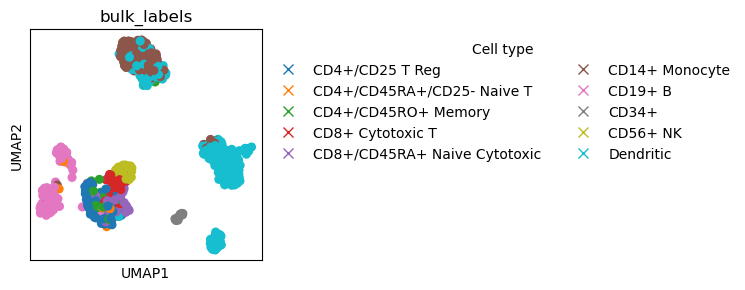

In [22]:
from matplotlib.lines import Line2D

fig = sc.pl.umap(adata, color=["bulk_labels"], return_fig=True)
ax = fig.axes[0]
# Remove original Legend
ax.legend_.remove()
# Make new Legend
l1 = ax.legend(
    # Add Legend element for each color group
    handles=[
        # Instead of Line2D we can also use other matplotlib objects, such as Patch, etc.
        Line2D(
            [0],
            [0],
            marker="x",
            color=c,
            lw=0,
            label=l,
            markerfacecolor=c,
            markersize=7,
        )
        # Color groups in adata
        for l, c in zip(
            list(adata.obs.bulk_labels.cat.categories), adata.uns["bulk_labels_colors"]
        )
    ],
    # Customize Legend outline
    # Remove background
    frameon=False,
    # Make more Legend columns
    ncols=2,
    # Change location to not overlap with the plot
    bbox_to_anchor=(1, 1),
    # Set title
    title="Cell type",
)

### Annotating scatter plots

이미 생성된 플롯 위에 추가로 그려서 객체에 표시할 수 있다.

여기서는 플롯 위의 단일 객체에 원을 그리고, 그 표시에 대해 설명하는 새로운 legend를 추가하는 방법을 보여준다.

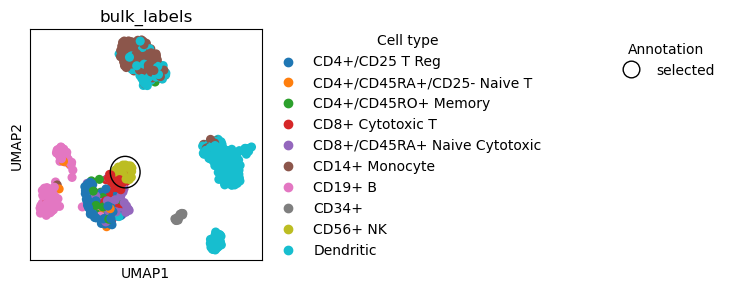

In [23]:
fig, ax = plt.subplots(figsize=(3, 3))
sc.pl.umap(adata, color=["bulk_labels"], ax=ax, show=False)

# Encircle part of the plot

# Find location on the plot where circle should be added
location_cells = adata[adata.obs.bulk_labels == "CD56+ NK", :].obsm["X_umap"]
x = location_cells[:, 0].mean()
y = location_cells[:, 1].mean()
size = 1.5  # Set circle size
# Plot circle
circle = plt.Circle((x, y), size, color="k", clip_on=False, fill=False)
ax.add_patch(circle)

# Add annother Legend for the mark

# Save the original Legend
l1 = ax.get_legend()
l1.set_title("Cell type")
# Make a new Legend for the mark
l2 = ax.legend(
    handles=[
        Line2D(
            [0],
            [0],
            marker="o",
            color="k",
            markerfacecolor="none",
            markersize=12,
            markeredgecolor="k",
            lw=0,
            label="selected",
        )
    ],
    frameon=False,
    bbox_to_anchor=(3, 1),
    title="Annotation",
)
# Add back the original Legend which was overwritten by the new Legend
_ = plt.gca().add_artist(l1)

플롯에 객체를 표시하기 위해 adjustText와 같은 외부 패키지를 사용할 수도 있다.

adjustText는 여러 개의 가까운 플롯 위치에 주석을 달 때 텍스트가 서로 겹치는것을 최소화 해준다.

Axes: Axes(0.146628,0.15;0.568915x0.73)


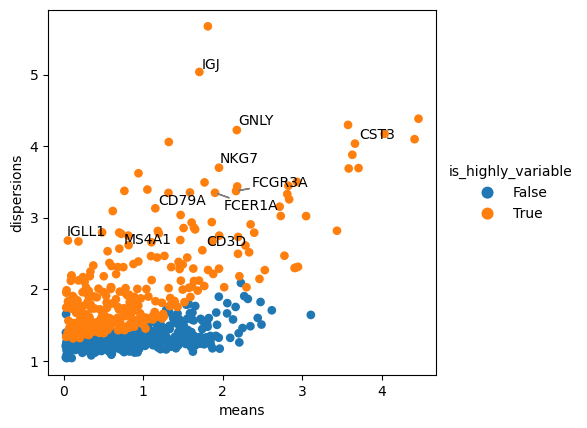

In [25]:
# Package used for adding well aligned labels on the plot
from adjustText import adjust_text

with plt.rc_context({"figure.figsize": (5, 5)}):
    x = "means"
    y = "dispersions"
    color = "is_highly_variable"
    adata.var["is_highly_variable"] = (
        adata.var["highly_variable"].astype(bool).astype(str)
    )
    ax = sc.pl.scatter(adata, x=x, y=y, color=color, show=False)
    print("Axes:", ax)
    # Move plot title from Axes to Legend
    ax.set_title("")
    ax.get_legend().set_title(color)

    # Labels

    # Select genes to be labeled
    texts = []
    genes = [
        "CD79A",
        "MS4A1",
        "FCER1A",
        "CST3",
        "FCGR3A",
        "GNLY",
        "NKG7",
        "IGLL1",
        "IGJ",
        "CD3D",
    ]
    for gene in genes:
        # Position of object to be marked
        x_loc = adata.var.at[gene, x]
        y_loc = adata.var.at[gene, y]
        # Text color
        color_point = "k"
        texts.append(ax.text(x_loc, y_loc, gene, color=color_point, fontsize=10))

    # Label selected genes on the plot
    _ = adjust_text(
        texts,
        expand=(1.2, 1.2),
        arrowprops=dict(color="gray", lw=1),
        ax=ax,
    )

### Colors

여기서는 Scanpy에서 색상을 정의하는 방법과 색상 팔레트에 대한 몇 가지 권장 사항을 정리하여 보여준다.

### Discrete palettes
Scanpy 에서 개별 범주 (카테고리)의 색상을 정의하려면 딕셔너리(dictionary)를 사용하면 된다.

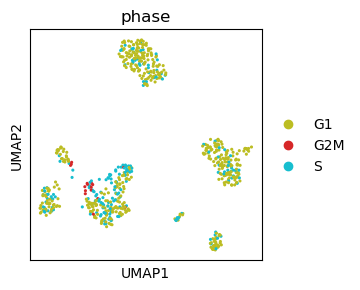

In [26]:
sc.pl.umap(
    adata,
    color="phase",
    s=20,
    palette = {"S": "tab:cyan","G1": "tab:olive","G2M":"tab:red"},
)

### Continous palettes

중심을 벗어난 값 (non-centered values)에는 'viridis' 팔레트를 추천한다.

이 팔레트는 색상 지각이 균일하고 색맹 친화적이기 떄문이다.

중심에 있는 값 (centered values)에는 발산형 팔레트를 추천하며, 이 팔레트의 중심은 중심 값 (ex:0)과 일치하도록 설정해야한다.

Scanpy에서 발산형 팔레트의 중심을 맞추려면 **vcenter**를 사용할 수 있다. 

또는 **vmin**과 **vmax**를 사용하여 팔레트를 대칭적으로 만들 수도 있다.

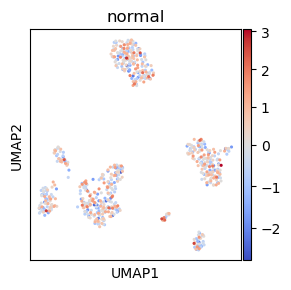

In [27]:
# Center palette with vcenter

# Make mock column for plotting, here we use random values from normal distribution
loc = 0
adata.obs["normal"] = np.random.normal(loc=loc, size=adata.shape[0])

# Center at mean (loc) of the distribution with vcenter parameter
sc.pl.umap(adata, color="normal", cmap="coolwarm", s=20, vcenter=loc)
adata.obs.drop("normal", axis=1, inplace=True)

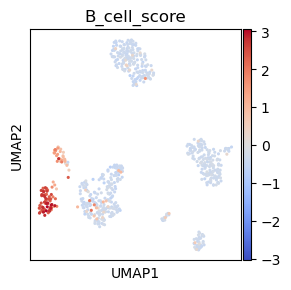

In [28]:
# Make symmetric palette with vmin and vmax

# Make mock column for plotting, here we use B cell score
sc.tl.score_genes(adata, ["CD79A", "MS4A1"], score_name="B_cell_score")

# To make a symmetric palette centerd around 0 we set vmax to maximal absolut value and vmin to
# the negative value of maxabs
maxabs = max(abs(adata.obs["B_cell_score"]))
sc.pl.umap(
    adata, color="B_cell_score", cmap="coolwarm", s=20, vmin=-maxabs, vmax=maxabs
)
adata.obs.drop("B_cell_score", axis=1, inplace=True)

**Matplotlib**는 또한 스케일링(예: 로그), 값 범위 정규화, 중앙 맞춤(centering), 사용자 지정 색상 조합 또는 동적 범위를 사용하는 맞춤형(custom) 색상 팔레트를 지원한다.

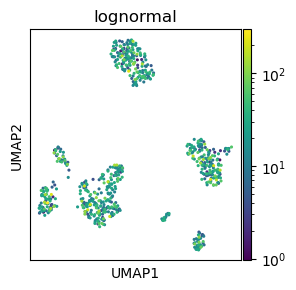

In [29]:
# Log-scaled palette

# Make mock column with log-normally distirbuited values
adata.obs["lognormal"] = np.random.lognormal(3, 1, adata.shape[0])

# Log scaling of the palette
norm = mcolors.LogNorm()
sc.pl.umap(adata, color="lognormal", s=20, norm=norm)

adata.obs.drop("lognormal", axis=1, inplace=True)

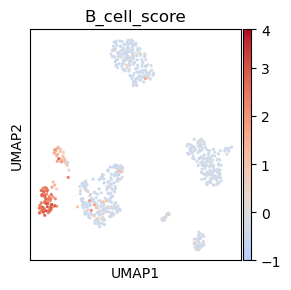

In [30]:
# Centered non-symmetric palette

# Make mock column for plotting, here we use B cell score
sc.tl.score_genes(adata, ["CD79A", "MS4A1"], score_name="B_cell_score")


# Palette normalization with centering and adapted dynamic range to correspond to
# the distance of vmin and vmax from the cenetr
# Adapted from https://stackoverflow.com/a/50003503
class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0, clip=False):
        self.midpoint = midpoint
        mcolors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        value = np.array(value).astype(float)
        normalized_min = max(
            0.0,
            0.5
            * (1.0 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))),
        )
        normalized_max = min(
            1.0,
            0.5
            * (1.0 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))),
        )
        normalized_mid = 0.5
        x, y = (
            [self.vmin, self.midpoint, self.vmax],
            [normalized_min, normalized_mid, normalized_max],
        )
        return np.ma.masked_array(np.interp(value, x, y))


# Add padding arround vmin and vmax as Colorbar sets value limits to round numbers below and
# above the vmin and vmax, respectively, which means that they can not be assigned the correct
# color with our nomalisation function that is limited to vmin and vmax
# However, this padding reduces the dynamic range as we set a broad padding and
# then later discard values that are not needed for the rounding up and down
# of the vmin and vmax on the Colorbar, respectively
vmin = adata.obs["B_cell_score"].min()
vmax = adata.obs["B_cell_score"].max()
vpadding = (vmax - vmin) * 0.2
norm = MidpointNormalize(vmin=vmin - vpadding, vmax=vmax + vpadding, midpoint=0)
# Plot umap
fig = sc.pl.umap(
    adata,
    color="B_cell_score",
    cmap="coolwarm",
    s=20,
    norm=norm,
    return_fig=True,
    show=False,
)
# Adjust Colorbar ylim to be just outside of vmin,vmax and not far outside of this range
# as the padding we set initially may be too broad
cmap_yticklabels = np.array([t._y for t in fig.axes[1].get_yticklabels()])
fig.axes[1].set_ylim(
    max(cmap_yticklabels[cmap_yticklabels < vmin]),
    min(cmap_yticklabels[cmap_yticklabels > vmax]),
)

adata.obs.drop("B_cell_score", axis=1, inplace=True)

### Colorblind friendly palettes

색각이상자를 배려한 색상 팔레트를 만들 수 있는 여러 자료들이 있습니다.

예를 들어, 파이썬 패키지 중에는 연속형인 virids 팔레트와 불연속형인 bokeh 팔레트가 있다.

우리가 사용하는 팔레트가 색각이상자에게 친화적인지 평가하는 데 도움이 되는 도구들은 다음과 같다.

- **Coloring for Colorblindness** : 불연속적인 팔레트에 대해 다양한 종류의 색각 이상을 시뮬레이션할 수 있는 웹 기반 도구
- **Color Oracle** : 컴퓨터 화면에 색각 이상 필터를 적용해 주는 다운로드 가능한 애플리케이션

### UMAP
이 섹션은 umap, embedding() 관련 팁을 보여준다.

### Coloring cell subset

전체 세포를 배경으로 먼저 플롯하고, 그 위에 개별 세포 그룹들을 색을 입혀 플롯하는 방법을 보여준다.

범주형 색상을 사용할 때 groups 매개변수를 이용하면 특정 세포 그룹에만 색을 입힐 수 있다.

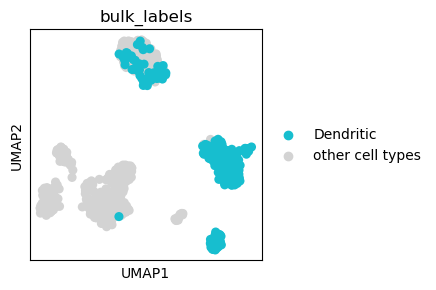

In [32]:
ax = sc.pl.umap(adata, color=["bulk_labels"], groups=["Dendritic"], show=False)

# We can change the 'NA' in the legend that represents all cells outside of the
# specified groups
legend_texts = ax.get_legend().get_texts()
# Find legend object whose text is "NA" and change it
for legend_text in legend_texts:
    if legend_text.get_text() == "NA":
        legend_text.set_text("other cell types")

개별 세포 그룹의 연속적인 값을 플롯할 때도 obs_mask 인자를 사용할 수 있다.

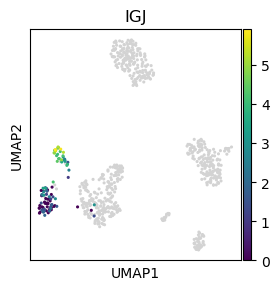

In [33]:
sc.pl.umap(adata, color="IGJ", mask_obs=(adata.obs.bulk_labels == "CD19+ B"), size=20)

### Cell ordering

embedding 함수는 연속적인 값을 기준으로 세포를 정렬하여 점수가 가장 높은 세포들을 맨 위에 플롯할 수 있도록 허용한다 (sort_order 매개변수 사용).

하지만 범주형 값의 경우, embedding은 현재 특별한 정렬 매개변수를 제공하지 않는다.

대신, 세포들은 AnnData에 저장된 순서 그대로 플롯이 된다. 

따라서 예를 들어, 두 개의 배치(batch)로 된 두 개의 AnnData 객체를 연결(concatenate)하고 배치들의 위치를 시각화하고 싶을 때, 

한 배치가 다른 배치 위에 겹쳐서 플롯될 것입니다. 그러므로 두 배치 모두가 보이도록 하려면 먼저 세포들의 순서를 재정렬해야 한다.

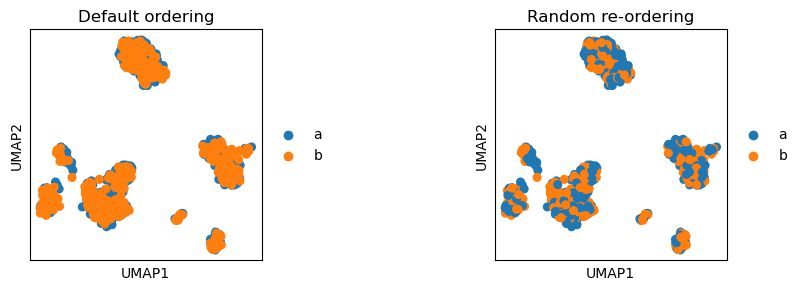

In [34]:
# Make two batches in the adata object for the plot example
adata.obs["batch"] = ["a"] * int(adata.shape[0] / 2) + ["b"] * (
    adata.shape[0] - int(adata.shape[0] / 2)
)

fig, axs = plt.subplots(1, 2, figsize=(9, 3))
plt.subplots_adjust(wspace=1)
sc.pl.umap(adata, color="batch", ax=axs[0], title="Default ordering", show=False)
# Randomly order cells by making a random index and subsetting AnnData based on it
# Set a random seed to ensure that the cell ordering will be reproducible
np.random.seed(0)
random_indices = np.random.permutation(list(range(adata.shape[0])))
sc.pl.umap(
    adata[random_indices, :], color="batch", ax=axs[1], title="Random re-ordering"
)

### Optimising UMAP layout

UMAP 레이아웃은 세포들이 더 촘촘하거나 분산된 구조로 보이도록 수정할 수 있다. 

이는 sc.tl.umap 함수의 min_dist 및 spread 매개변수를 통해 조절할 수 있다.

아래에 다양한 매개변수 조합으로 계산된 UMAP 예시들을 보여준다.

/Users/yanghyejeong/miniforge3/envs/rna_analysis_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/yanghyejeong/miniforge3/envs/rna_analysis_env/lib/python3.13/site-packages/umap/umap_.py:1401: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/Users/yanghyejeong/miniforge3/envs/rna_analysis_env/lib/python3.13/site-packages/umap/umap_.py:1401: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/Users/yanghyejeong/miniforge3/envs/rna_analysis_env/lib/python3.13/site-packages/umap/umap_.py:1407: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covar = curve_fit(curve, xv, yv)
/Users/yanghyejeong/miniforge3/envs/rna_analysis_env/lib/python3.13/site-packages/umap/umap_.py:1401: RuntimeWa

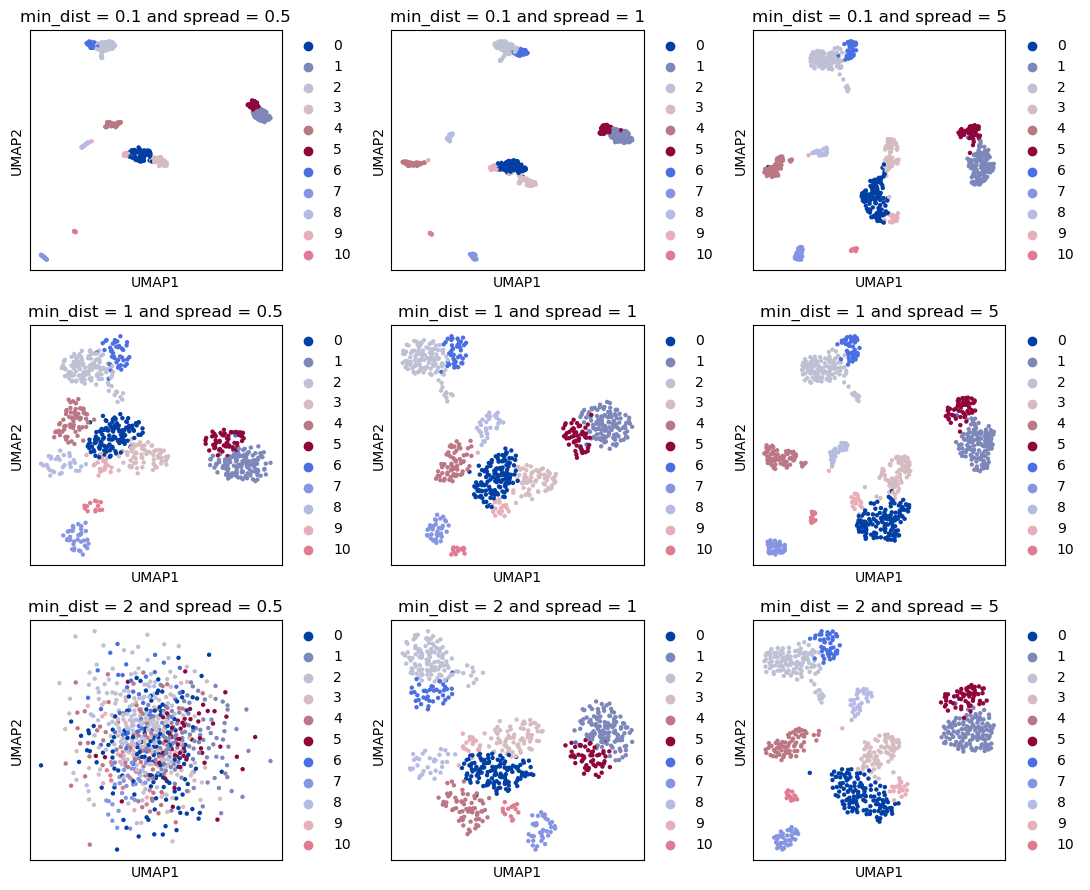

In [35]:
from itertools import product

# Copy adata not to modify UMAP in the original adata object
adata_temp = adata.copy()
# Loop through different umap parameters, recomputting and replotting UMAP for each of them
MIN_DISTS = [0.1, 1, 2]
SPREADS = [0.5, 1, 5]
# Create grid of plots, with a little extra room for the legends
fig, axes = plt.subplots(
    len(MIN_DISTS), len(SPREADS), figsize=(len(SPREADS) * 3 + 2, len(MIN_DISTS) * 3)
)

for (i, min_dist), (j, spread) in product(enumerate(MIN_DISTS), enumerate(SPREADS)):
    ax = axes[i][j]
    param_str = " ".join(["min_dist =", str(min_dist), "and spread =", str(spread)])
    # Recompute UMAP with new parameters
    sc.tl.umap(adata_temp, min_dist=min_dist, spread=spread)
    # Create plot, placing it in grid
    sc.pl.umap(
        adata_temp,
        color=["louvain"],
        title=param_str,
        s=40,
        ax=ax,
        show=False,
    )
plt.tight_layout()
plt.show()
plt.close()
del adata_temp

### PAGA

In [36]:
sc.tl.paga(adata, groups="louvain")

### Prune PAGA edges

edge weight (연결강도) 분포를 기반으로 플롯에서 약한 PAGA 엣지 (edge)들을 제거 한다.

대부분의 엣지 가중치가 비교적 약할 것이라는 가정에 근거하며, 따라서 분포에서 벗어나는 소수의 가장 흥미로운 엣지들을 발견할 수 있다.

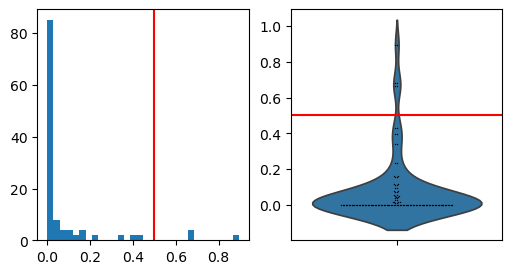

In [37]:
# Distribution of PAGA connectivities for determining the cutting threshold
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
paga_conn = adata.uns["paga"]["connectivities"].toarray().ravel()
a = axs[0].hist(paga_conn, bins=30)
sns.violinplot(paga_conn, ax=axs[1], inner=None)
sns.swarmplot(paga_conn, ax=axs[1], color="k", size=1)
thr = 0.5
_ = axs[1].axhline(thr, c="r")
_ = axs[0].axvline(thr, c="r")

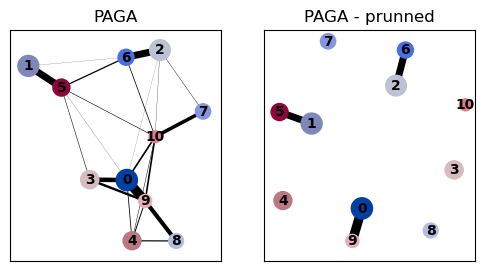

In [38]:
# Compare PAGA with and without prunning
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
sc.pl.paga(adata, ax=axs[0], title="PAGA", show=False)
sc.pl.paga(adata, ax=axs[1], title="PAGA - prunned", threshold=thr)

### PAGA layout

PAGA에서 사용되는 레이아웃은 PAGA 연결성(edge weights)에 맞게 최적화되어 있다.

하지만 때로는 다른 레이아웃을 원할 수도 있다.

이런 경우는 **pos**인자를 사용할 수 있다.

### PAGA layout corresponding to UMAP
PAGA dot의 중심을 해당 그룹에 속한 세포들의 UMAP 임베딩 값의 평균으로 설정하세요.

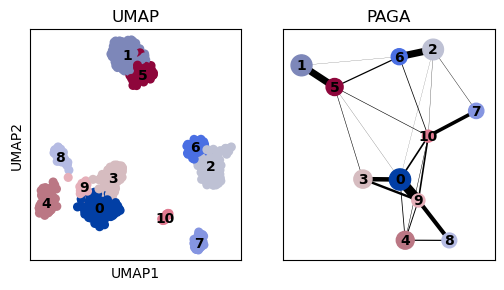

In [39]:
# Compare UMAP and PAGA layouts
fig,axs = plt.subplots(1,2, figsize=(6,3))
sc.pl.umap(
    adata, color="louvain", ax=axs[0], show=False, title="UMAP", legend_loc='on data'
)

sc.pl.paga(adata, ax=axs[1], title="PAGA")

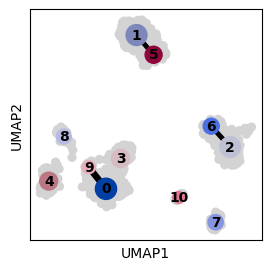

In [40]:
# Define PAGA positions based on the UMAP layout -
# for each cluster we use the mean of the UMAP positions from the cells in that cluster
pos = pd.DataFrame(adata.obsm["X_umap"], index=adata.obs_names)
pos["group"] = adata.obs[adata.uns["paga"]["groups"]]
pos = pos.groupby("group", observed=True).mean()

# Plot UMAP in the background
ax = sc.pl.umap(adata, show=False)
# Plot PAGA ontop of the UMAP
sc.pl.paga(
    adata,
    color="louvain",
    threshold=thr,
    node_size_scale=1,
    edge_width_scale=0.7,
    pos=pos.values,
    random_state=0,
    ax=ax,
)